<a href="https://colab.research.google.com/github/Manojyadav72/EmployeeSalaryPrediction/blob/main/EmployeeSalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Load Data

In [107]:
df = pd.read_csv("adult 3.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Clean Missing Data

In [85]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

Encode Categorical Columns

In [86]:
from tensorflow.keras.layers import Dense, Dropout
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

plit Features and Target

In [87]:
X = df.drop("income", axis=1)
y = df["income"]

Normalize Features

In [88]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_categorical = to_categorical(y)

Train-Test Split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


Build Model

In [90]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Model

In [91]:
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.1)


Epoch 1/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7621 - loss: 0.4957 - val_accuracy: 0.8107 - val_loss: 0.3932
Epoch 2/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8237 - loss: 0.3758 - val_accuracy: 0.8286 - val_loss: 0.3656
Epoch 3/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8314 - loss: 0.3644 - val_accuracy: 0.8289 - val_loss: 0.3508
Epoch 4/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8348 - loss: 0.3543 - val_accuracy: 0.8281 - val_loss: 0.3497
Epoch 5/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8349 - loss: 0.3542 - val_accuracy: 0.8402 - val_loss: 0.3410
Epoch 6/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8373 - loss: 0.3464 - val_accuracy: 0.8389 - val_loss: 0.3432
Epoch 7/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8363 - loss: 0.3497 - val_accuracy: 0.8380 - val_loss: 0.3434
Epoch 8/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8393 - loss: 0.3461 - val_accuracy: 0.

Evaluate Model

In [92]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8507 - loss: 0.3223
Test Accuracy: 84.77%


Classification Report

In [93]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels))


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6842
           1       0.76      0.55      0.64      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.75      0.77      9045
weighted avg       0.84      0.85      0.84      9045



Confusion Matrix

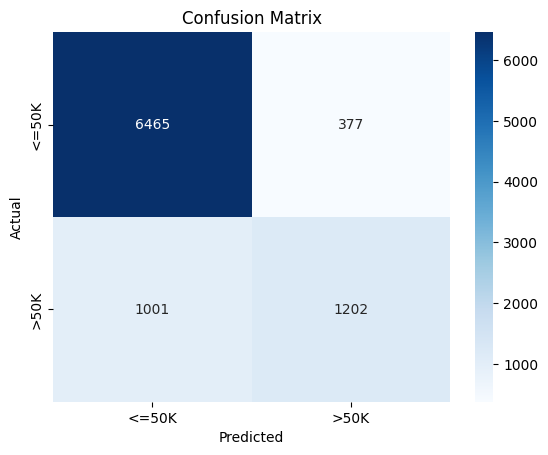

In [94]:
cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy and Loss Plots

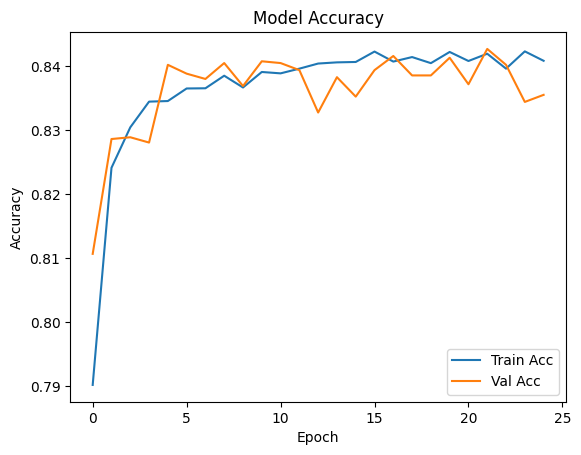

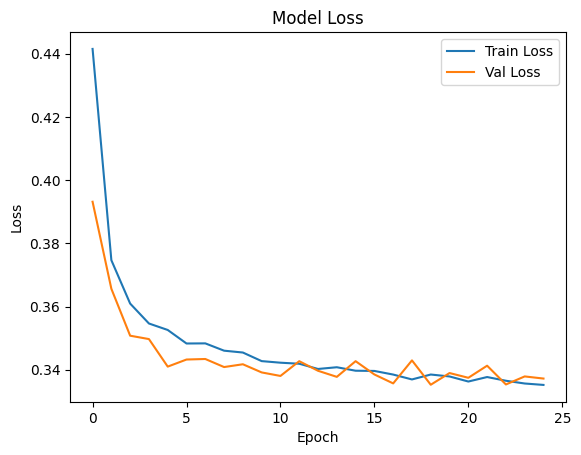

In [95]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [96]:
!pip install streamlit pyngrok --quiet
from sklearn.linear_model import LinearRegression
import numpy as np
import joblib

X = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
y = np.array([30000, 50000, 70000, 90000])

model = LinearRegression()
model.fit(X, y)

joblib.dump(model, "salary_model.pkl")

['salary_model.pkl']

In [103]:
%%writefile EmployeeSalaryPrediction.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


st.title("💼 Employee Salary Prediction (Deep Learning)")

uploaded_file = st.file_uploader("Upload CSV file (adult dataset format)", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    st.subheader("🔍 Raw Data Preview")
    st.write(df.head())

    # Preprocessing
    df.replace("?", np.nan, inplace=True)
    df.dropna(inplace=True)

    # Encode categorical features
    label_encoders = {}
    for col in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


    X = df.drop("income", axis=1)
    y = df["income"]

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    y_encoded = to_categorical(y)


    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

    # Model Training
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    st.success(f"✅ Model trained successfully! Test Accuracy: {accuracy * 100:.2f}%")

    st.subheader("📊 Predict Salary for New Employee")

    #  Input Form
    with st.form("prediction_form"):
        age = st.number_input("Age", 18, 90, 30)
        education = st.selectbox("Education", df["education"].unique())
        occupation = st.selectbox("Occupation", df["occupation"].unique())
        workclass = st.selectbox("Workclass", df["workclass"].unique())
        relationship = st.selectbox("Relationship", df["relationship"].unique())
        race = st.selectbox("Race", df["race"].unique())
        gender = st.selectbox("Gender", df["gender"].unique())
        hours = st.slider("Hours per Week", 1, 100, 40)
        capital_gain = st.number_input("Capital Gain", 0, 100000, 0)
        capital_loss = st.number_input("Capital Loss", 0, 10000, 0)
        fnlwgt = st.number_input("Fnlwgt", 10000, 1000000, 100000)
        native_country = st.selectbox("Native Country", df["native-country"].unique())
        edu_num = st.number_input("Educational Num", 1, 16, 10)

        submitted = st.form_submit_button("Predict Salary")

    # Prediction
    if submitted:
        input_data = pd.DataFrame([[
            age,
            workclass,
            fnlwgt,
            education,
            edu_num,
            relationship,
            occupation,
            race,
            gender,
            capital_gain,
            capital_loss,
            hours,
            native_country
        ]], columns=[
            'age', 'workclass', 'fnlwgt', 'education', 'educational-num',
            'relationship', 'occupation', 'race', 'gender',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
        ])

        # Encode user input
        for col in input_data.columns:
            if col in label_encoders:
                input_data[col] = label_encoders[col].transform(input_data[col])

        # Scale user input
        input_scaled = scaler.transform(input_data)

        # Predict
        pred = model.predict(input_scaled)
        salary_class = np.argmax(pred)

        result = "<=50K" if salary_class == 0 else ">50K"
        st.success(f"💰 Predicted Salary: {result}")


Overwriting EmployeeSalaryPrediction.py


In [104]:
from pyngrok import ngrok
!ngrok config add-authtoken 30BRD1byZpyqJzzZtDPU2cRDYTn_5hUHBKi6BSm88dnQ4hWAw

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [105]:



public_url = ngrok.connect(addr=8501)
print(f"🌐 Open your app here: {public_url}")

🌐 Open your app here: NgrokTunnel: "https://6b0f21ea2b3a.ngrok-free.app" -> "http://localhost:8501"
